# Lab 1

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

df = pd.read_csv('ds_salary.csv')

## 1. General Salary Data
Start by plotting and describing the general shape of the salary data. This initial
step sets the foundation for your analysis.

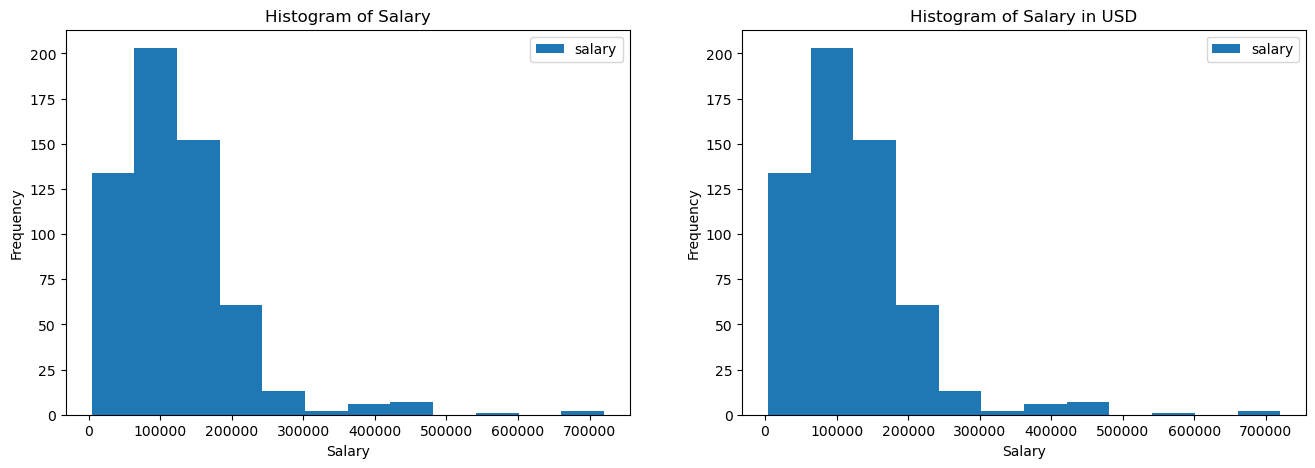

In [38]:
fig1, (ax11, ax12) = plt.subplots(1, 2, figsize=(16, 5))
plt.sca(ax11)
df.plot(kind='hist', y='salary', ax=ax11, bins=12)
plt.title('Histogram of Salary')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.sca(ax12)
df.plot(kind='hist', y='salary', ax=ax12, bins=12)
plt.title('Histogram of Salary in USD')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

In [39]:
df['salary'].describe()

count       581.000000
mean     123685.096386
std       85286.402256
min        4000.000000
25%       67000.000000
50%      110000.000000
75%      157000.000000
max      720000.000000
Name: salary, dtype: float64

*Salary follows a right-skewed, unimodal distribution. The max salary in the dataset is 720,000, but most salaries fall in the 0 to 200,000 range. The standard deviation is 85,286 and the IQR is 90,000. Salary in USD follows a very similar distribution, although it may be even a little more right-skewed.*

## 2. Effect of Experience on Salary
Investigate how experience influences data scientist salaries. Create visualizations or
tables to illustrate any trends or patterns.

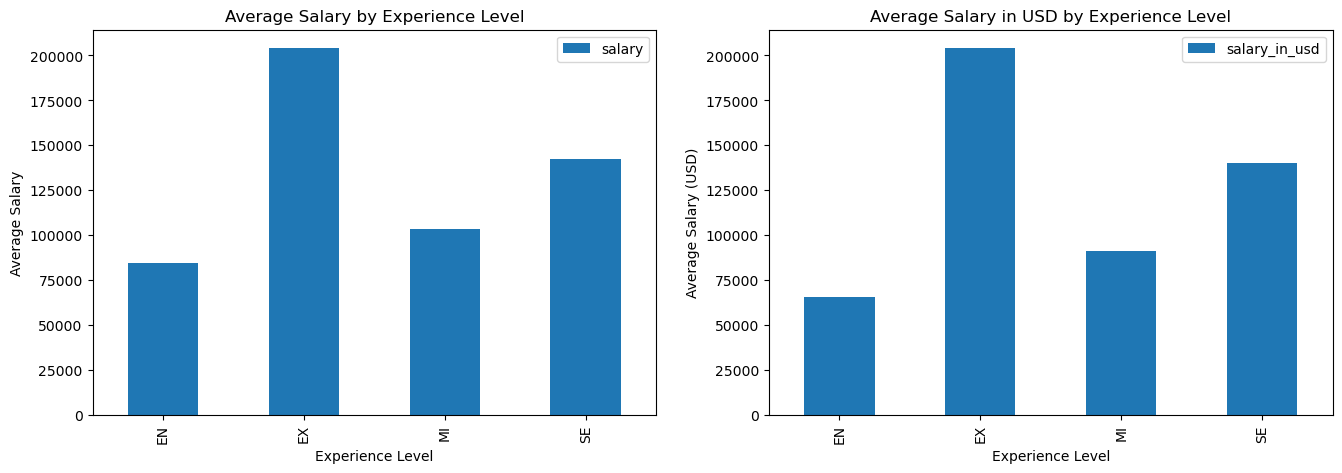

In [40]:

grouped_df_non_US = df[['experience_level', 'salary']].groupby('experience_level').mean()
grouped_df_US = df[['experience_level', 'salary_in_usd']].groupby('experience_level').mean()

# Creating the subplots
fig1, (ax21, ax22) = plt.subplots(1, 2, figsize=(16, 5))

# Plot for salary in the first axis
plt.sca(ax21)
grouped_df_non_US.plot(kind='bar', ax=ax21)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')

# Plot for salary_in_usd in the second axis
plt.sca(ax22)
grouped_df_US.plot(kind='bar', ax=ax22)
plt.title('Average Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')

# Display the plots
plt.show()


## 3. Impact of Company Size on Salary
Explore how company size affects data scientist salaries. Generate plots or tables to
visualize this relationship.

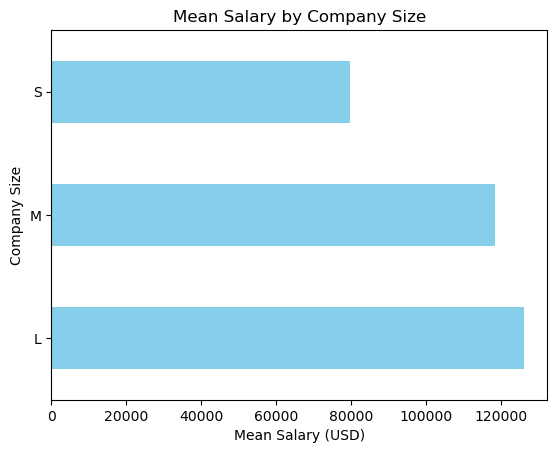

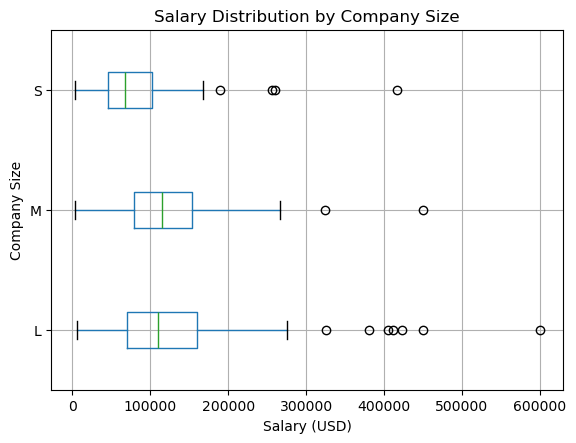

F-value: 12.765998591696347, P-value: 3.756285988564423e-06


In [41]:
# Mean salary by company size
mean_salaries = df.groupby('company_size')['salary_in_usd'].mean()
mean_salaries.plot(kind='barh', color='skyblue')
plt.title('Mean Salary by Company Size')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Company Size')
plt.show()

# Boxplots showing how company size influences salary
df.boxplot(column='salary_in_usd', by='company_size', vert=False)
plt.title('Salary Distribution by Company Size')
plt.suptitle('') 
plt.xlabel('Salary (USD)')
plt.ylabel('Company Size')
plt.show()

# Anova
f_value, p_value = stats.f_oneway(
    df[df['company_size'] == 'L']['salary_in_usd'],
    df[df['company_size'] == 'M']['salary_in_usd'],
    df[df['company_size'] == 'S']['salary_in_usd']
)

print(f"F-value: {f_value}, P-value: {p_value}")


The first plot shows the mean salaries between the different companies, this shows that while smaller companies pay lower salaries, the medium and large companies pay similar salaries.

The second plot is a box plot, which helps us to see the outliers, which shows us that the larger company actually has a lower mean salary when not considering outliers.

Last is a one-way anova analysis, which gives us an F-value of 12.765 and a P-value of 3.756e-06. The high F-value tells us that the variance between the groups are higher than the variance of the salaries within the groups. This signifies that the group means differ. The extremely low P-value tells us that there is a significant difference between the size of the company you work for.

In conclusion, if you work at a larger company, you are more likely to make more money.

## 4. Job Title Analysis
Job titles can vary significantly. For this project, select a keyword or phrase to distinguish
between different job titles. For instance, you can differentiate between job
titles containing the word ”Analyst” and those that do not. To achieve this, you may
find the str.contains function in Pandas helpful. Refer to this resource for examples:
https://www.geeksforgeeks.org/python-pandas-series-str-contains. Explore
various job titles to decide on the keyword or phrase you want to focus on.

In [48]:
titles_df = df.copy()
titles = ['Scientist', 'Engineer', 'Analyst', 'Manager', 'Head', 'Director', 'Developer']

for title in titles:
    titles_df[title] = df['job_title'].str.contains(title)
titles_df.head()

def get_title(row):
    for title in titles:
        if row[title]:
            return title
    return 'Other' 

df['title'] = titles_df.apply(get_title, axis=1)

df[['title', 'salary']].groupby('title').mean().sort_values(by='salary', ascending=False)

,salary
title,
Director,193285.714286
Other,177755.136364
Manager,155451.277778
Head,152097.222222
Scientist,128209.010929
Engineer,121123.203620
Analyst,101723.732759
Developer,80000.000000


*Directors received the highest pay on average, but our "other" category was close behind, suggesting that the roles that are not as easily categorized are high paying. Analysts and developers were payed the least, although the sample size of developers is too small to really be useful.*

## 5. Interactions Between Relationships
Investigate potential interactions between the three factors (experience, company size,
and job title). Create a two-way table that displays essential statistics at the intersection
of two variables. For instance, construct a table with job titles on the left,
company sizes at the top, and each cell representing the mean salary for each job
title/company size combination.

In [43]:
pivot_table = pd.pivot_table(df, values='salary', 
                             index='Title', 
                             columns='company_size', 
                             aggfunc='mean', 
                             fill_value=0)

styled_table = pivot_table.style.format('${:,.2f}')

styled_table


company_size,L,M,S
Title,,,
Analyst,"$117,418.24","$99,737.03","$82,106.00"
Developer,$0.00,"$75,000.00","$100,000.00"
Director,"$215,000.00","$110,000.00","$168,000.00"
Engineer,"$128,513.64","$118,704.27","$115,064.48"
Head,"$184,000.00","$169,218.75","$70,000.00"
Manager,"$161,000.00","$151,920.27",$0.00
Other,"$161,500.00","$218,601.18","$71,333.33"
Scientist,"$129,653.22","$126,496.21","$130,023.57"


## 6. Conclusion
Summarize your findings by listing all significant relationships you have discovered
during your analysis.